In [2]:
import pickle
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# For warnings
import warnings
warnings.filterwarnings(action='ignore')


In [3]:
df = pd.read_csv('./preprocessing-22-featues.csv')

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,2715568.0,15577.303220,9505.280957,500.00,8000.00,13850.000,21000.000,4.000000e+04
installment,2715568.0,458.183966,273.773971,4.93,258.57,388.860,612.310,1.719830e+03
annual_inc,2715568.0,82098.474526,113301.169778,0.00,49890.00,69223.335,98000.000,1.100000e+08
dti,2715568.0,19.013989,13.024244,-1.00,12.05,18.000,24.690,9.990000e+02
delinq_2yrs,2715568.0,0.294156,0.851119,0.00,0.00,0.000,0.000,5.800000e+01
inq_last_6mths,2715568.0,0.558192,0.863515,0.00,0.00,0.000,1.000,3.300000e+01
open_acc,2715568.0,11.789382,5.749429,1.00,8.00,11.000,15.000,1.040000e+02
pub_rec,2715568.0,0.171758,0.522445,0.00,0.00,0.000,0.000,8.600000e+01
revol_bal,2715568.0,17246.140181,23233.229247,0.00,6149.00,11725.000,20973.000,2.904836e+06
total_acc,2715568.0,24.163357,12.098202,1.00,15.00,22.000,31.000,1.760000e+02


In [5]:
df.isnull().sum()  # 验证一下

loan_amnt                     0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
purpose                       0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
last_pymnt_amnt               0
loan_status                   0
collections_12_mths_ex_med    0
dtype: int64

In [6]:
# 创建一个新的DataFrame来保存列名和数据类型
columns_feature_df = pd.DataFrame({
    'Column': df.columns,
    'Data Type': df.dtypes
})
# 打印列名和数据类型信息
print("列名和数据类型:")
print(columns_feature_df)

列名和数据类型:
                                                Column Data Type
loan_amnt                                    loan_amnt   float64
term                                              term    object
int_rate                                      int_rate    object
installment                                installment   float64
grade                                            grade    object
sub_grade                                    sub_grade    object
emp_length                                  emp_length    object
home_ownership                          home_ownership    object
annual_inc                                  annual_inc   float64
verification_status                verification_status    object
purpose                                        purpose    object
dti                                                dti   float64
delinq_2yrs                                delinq_2yrs   float64
inq_last_6mths                          inq_last_6mths   float64
open_acc        

一共22列

In [7]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,loan_status,collections_12_mths_ex_med
0,5000.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,...,0.0,1.0,3.0,0.0,13648.0,83.7%,9.0,171.62,Paid,0.0
1,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,...,0.0,5.0,3.0,0.0,1687.0,9.4%,4.0,119.66,Default,0.0
2,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,...,0.0,2.0,2.0,0.0,2956.0,98.5%,10.0,649.91,Paid,0.0
3,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,...,0.0,1.0,10.0,0.0,5598.0,21%,37.0,357.48,Paid,0.0
4,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,...,0.0,0.0,15.0,0.0,27783.0,53.9%,38.0,67.30,Paid,0.0


In [8]:
# 将我们的特征分为分类和数字
categorical_1=[feature for feature in df.columns if df[feature].dtype=='object']
numerical_1=[feature for feature in df.columns if feature not in categorical_1]

In [9]:
print("categorical_1 columns:",categorical_1)
print("numerical_1 columns:",numerical_1)

categorical_1 columns: ['term', 'int_rate', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'revol_util', 'loan_status']
numerical_1 columns: ['loan_amnt', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'last_pymnt_amnt', 'collections_12_mths_ex_med']


看一下数值型变量的图

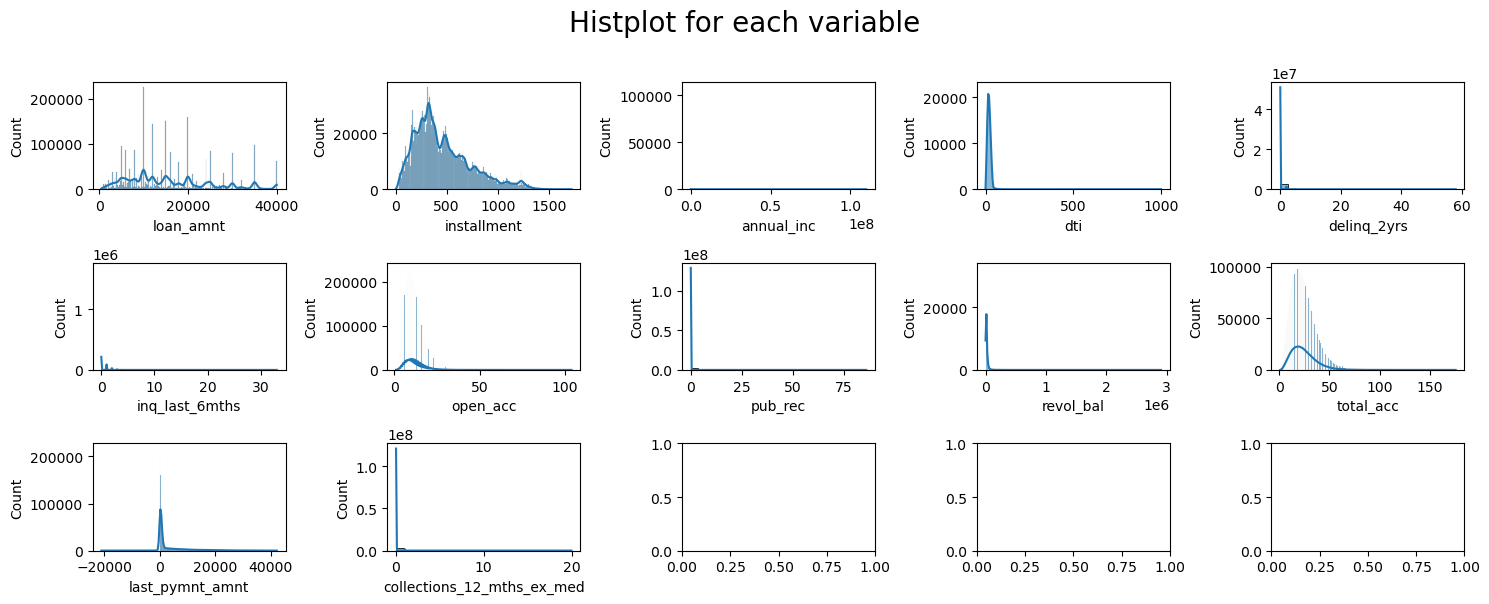

In [34]:

#Histplot for each variable in numerical list
def histplot_visual(data,column):
    fig, ax = plt.subplots(3,5,figsize=(15,6))
    fig.suptitle('Histplot for each variable',y=1, size=20)
    ax=ax.flatten()
    for i,feature in enumerate(column):
        sns.histplot(data=data[feature],ax=ax[i], kde=True)
histplot_visual(data=df,column=numerical_1)
plt.tight_layout()

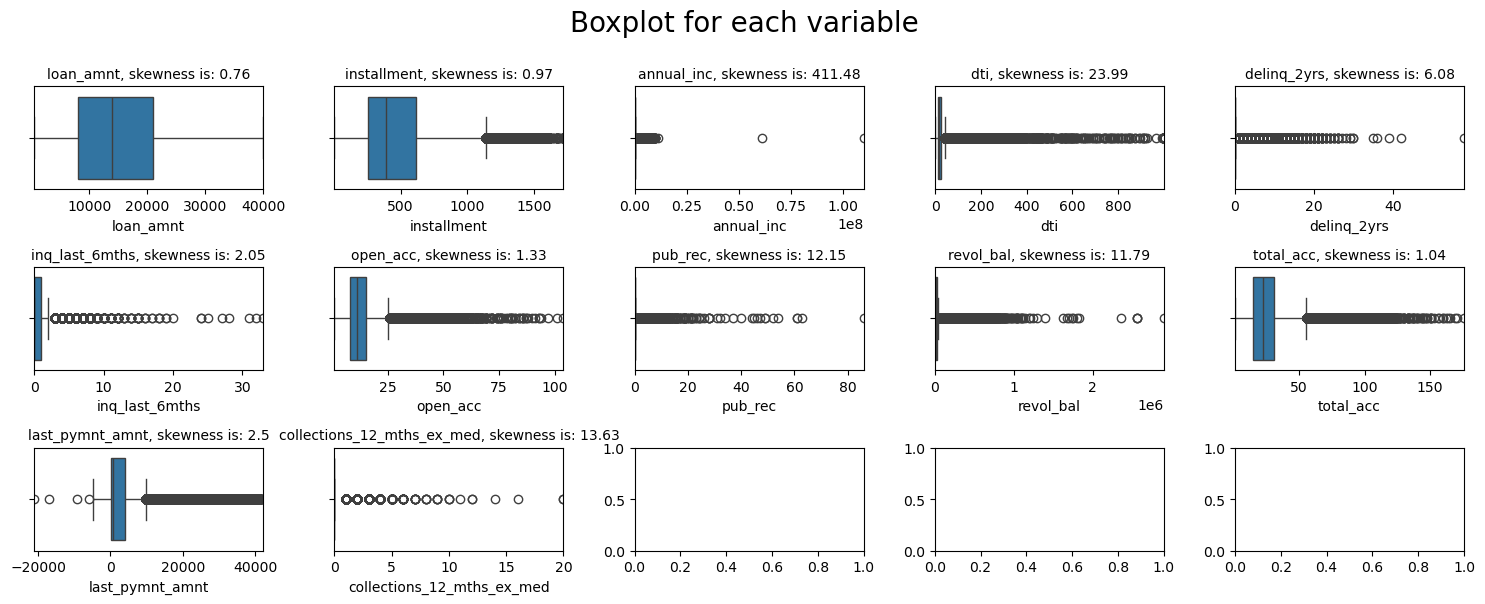

In [35]:

#Boxplot for each variable in numerical list
def boxplots_visual(data,column):
    fig, ax = plt.subplots(3,5,figsize=(15,6))
    fig.suptitle('Boxplot for each variable',y=1, size=20)
    ax=ax.flatten()
    for i,feature in enumerate(column):
        sns.boxplot(data=data[feature],ax=ax[i], orient='h')
        ax[i].set_title(feature+ ', skewness is: '+str(round(data[feature].skew(axis = 0, skipna = True),2)),fontsize=10)
        ax[i].set_xlim([min(data[feature]), max(data[feature])])
boxplots_visual(data=df,column=numerical_1)
plt.tight_layout()

## 预处理

In [10]:
df_copy = df

In [11]:
# Term column
print("Before:",df_copy['term'].unique())
df_copy['term'] = df_copy['term'].map(lambda x: x.lstrip(' ').rstrip(' months'))
print("After:",df_copy['term'].unique())
df_copy['term']= df_copy['term'].astype('int64')

Before: [' 36 months' ' 60 months']
After: ['36' '60']


In [12]:
# Label Encoding
df_copy['grade']= df_copy['grade'].map({'A':0,'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6})

df_copy['sub_grade']= df_copy['sub_grade'].map({'A1': 0, 'A2': 1, 'A3': 2, 'A4': 3, 'A5': 4, 
                                      'B1': 5, 'B2': 6, 'B3': 7, 'B4': 8, 'B5': 9, 
                                      'C1': 10, 'C2': 11, 'C3': 12, 'C4': 13, 'C5': 14, 
                                      'D1': 15, 'D2': 16, 'D3': 17, 'D4': 18, 'D5': 19, 
                                      'E1': 20, 'E2': 21, 'E3': 22, 'E4': 23, 'E5': 24, 
                                      'F1': 25, 'F2': 26, 'F3': 27, 'F4': 28, 'F5': 29, 
                                      'G1': 30, 'G2': 31, 'G3': 32, 'G4': 33, 'G5': 34})

df['emp_length']= df['emp_length'].map({'<1 year': 0,'1 year': 1,'2 years': 2,'3 years': 3,
                                        '4 years': 4, '5 years': 5,'6 years': 6,'7 years': 7,
                                        '8 years': 8,'9 years': 9, '10+ years': 10})

In [13]:
df_copy.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,loan_status,collections_12_mths_ex_med
0,5000.0,36,10.65%,162.87,1,6,10.0,RENT,24000.0,Verified,...,0.0,1.0,3.0,0.0,13648.0,83.7%,9.0,171.62,Paid,0.0
1,2500.0,60,15.27%,59.83,2,13,NaN,RENT,30000.0,Source Verified,...,0.0,5.0,3.0,0.0,1687.0,9.4%,4.0,119.66,Default,0.0
2,2400.0,36,15.96%,84.33,2,14,10.0,RENT,12252.0,Not Verified,...,0.0,2.0,2.0,0.0,2956.0,98.5%,10.0,649.91,Paid,0.0
3,10000.0,36,13.49%,339.31,2,10,10.0,RENT,49200.0,Source Verified,...,0.0,1.0,10.0,0.0,5598.0,21%,37.0,357.48,Paid,0.0
4,3000.0,60,12.69%,67.79,1,9,1.0,RENT,80000.0,Source Verified,...,0.0,0.0,15.0,0.0,27783.0,53.9%,38.0,67.30,Paid,0.0


In [14]:
df_copy.isnull().sum()  # 验证一下

loan_amnt                          0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_length                    271459
home_ownership                     0
annual_inc                         0
verification_status                0
purpose                            0
dti                                0
delinq_2yrs                        0
inq_last_6mths                     0
open_acc                           0
pub_rec                            0
revol_bal                          0
revol_util                         0
total_acc                          0
last_pymnt_amnt                    0
loan_status                        0
collections_12_mths_ex_med         0
dtype: int64

## 异常值的处理

In [15]:
# 定义要检查空值比例的列名
columns_to_check = ['emp_length']

# 初始化空值比例的字典
null_ratios = {}

# 遍历列名，计算每列的空值比例
for column in columns_to_check:
    null_count = df_copy[column].isnull().sum()
    total_count = df_copy[column].count()
    null_ratio = null_count / total_count if total_count > 0 else 0
    null_ratios[column] = null_ratio

# 打印每列的空值比例
for column, ratio in null_ratios.items():
    print(f"{column} 空值比例: {ratio:.2%}")

emp_length 空值比例: 11.11%


In [16]:
df_copy = df_copy.dropna(subset=columns_to_check)
df_copy

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,loan_status,collections_12_mths_ex_med
0,5000.0,36,10.65%,162.87,1,6,10.0,RENT,24000.0,Verified,...,0.0,1.0,3.0,0.0,13648.0,83.7%,9.0,171.62,Paid,0.0
2,2400.0,36,15.96%,84.33,2,14,10.0,RENT,12252.0,Not Verified,...,0.0,2.0,2.0,0.0,2956.0,98.5%,10.0,649.91,Paid,0.0
3,10000.0,36,13.49%,339.31,2,10,10.0,RENT,49200.0,Source Verified,...,0.0,1.0,10.0,0.0,5598.0,21%,37.0,357.48,Paid,0.0
4,3000.0,60,12.69%,67.79,1,9,1.0,RENT,80000.0,Source Verified,...,0.0,0.0,15.0,0.0,27783.0,53.9%,38.0,67.30,Paid,0.0
5,5000.0,36,7.90%,156.46,0,3,3.0,RENT,36000.0,Source Verified,...,0.0,3.0,9.0,0.0,7963.0,28.3%,12.0,161.03,Paid,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2715561,12000.0,60,28.69%,378.65,5,25,10.0,MORTGAGE,64500.0,Not Verified,...,0.0,3.0,22.0,1.0,16478.0,51.3%,42.0,10820.77,Paid,0.0
2715564,10000.0,36,7.99%,313.32,0,4,10.0,MORTGAGE,65000.0,Source Verified,...,1.0,0.0,15.0,0.0,9751.0,15.7%,27.0,2151.99,Paid,0.0
2715565,10050.0,36,16.99%,358.26,3,15,8.0,RENT,37000.0,Not Verified,...,0.0,1.0,15.0,0.0,14300.0,47%,21.0,358.26,Default,0.0
2715566,6000.0,36,11.44%,197.69,1,8,5.0,RENT,41000.0,Source Verified,...,1.0,0.0,9.0,0.0,1356.0,10.1%,18.0,2958.01,Paid,0.0


In [17]:
# 去掉 'int_rate' 列中的最后一个字符
df_copy['int_rate'] =df_copy['int_rate'].str.replace('%', '')

# 将 'int_rate' 列中的值转换为数值类型，并除以一百
df_copy['int_rate'] = pd.to_numeric(df_copy['int_rate']) / 100
# 去掉 'revol_util' 列中的最后一个字符
df_copy['revol_util'] =df_copy['revol_util'].str.replace('%', '')

# 将 'revol_util' 列中的值转换为数值类型，并除以一百
df_copy['revol_util'] = pd.to_numeric(df_copy['revol_util']) / 100

In [18]:
df_copy

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,loan_status,collections_12_mths_ex_med
0,5000.0,36,0.1065,162.87,1,6,10.0,RENT,24000.0,Verified,...,0.0,1.0,3.0,0.0,13648.0,0.837,9.0,171.62,Paid,0.0
2,2400.0,36,0.1596,84.33,2,14,10.0,RENT,12252.0,Not Verified,...,0.0,2.0,2.0,0.0,2956.0,0.985,10.0,649.91,Paid,0.0
3,10000.0,36,0.1349,339.31,2,10,10.0,RENT,49200.0,Source Verified,...,0.0,1.0,10.0,0.0,5598.0,0.210,37.0,357.48,Paid,0.0
4,3000.0,60,0.1269,67.79,1,9,1.0,RENT,80000.0,Source Verified,...,0.0,0.0,15.0,0.0,27783.0,0.539,38.0,67.30,Paid,0.0
5,5000.0,36,0.0790,156.46,0,3,3.0,RENT,36000.0,Source Verified,...,0.0,3.0,9.0,0.0,7963.0,0.283,12.0,161.03,Paid,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2715561,12000.0,60,0.2869,378.65,5,25,10.0,MORTGAGE,64500.0,Not Verified,...,0.0,3.0,22.0,1.0,16478.0,0.513,42.0,10820.77,Paid,0.0
2715564,10000.0,36,0.0799,313.32,0,4,10.0,MORTGAGE,65000.0,Source Verified,...,1.0,0.0,15.0,0.0,9751.0,0.157,27.0,2151.99,Paid,0.0
2715565,10050.0,36,0.1699,358.26,3,15,8.0,RENT,37000.0,Not Verified,...,0.0,1.0,15.0,0.0,14300.0,0.470,21.0,358.26,Default,0.0
2715566,6000.0,36,0.1144,197.69,1,8,5.0,RENT,41000.0,Source Verified,...,1.0,0.0,9.0,0.0,1356.0,0.101,18.0,2958.01,Paid,0.0


In [19]:
df_copy.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,2444109.0,15589.954468,9470.122705,500.0000,8000.0000,14000.0000,21000.0000,4.000000e+04
term,2444109.0,43.300938,11.041688,36.0000,36.0000,36.0000,60.0000,6.000000e+01
int_rate,2444109.0,0.130432,0.048579,0.0531,0.0917,0.1249,0.1599,3.099000e-01
installment,2444109.0,458.139344,272.550569,4.9300,259.3800,389.2600,611.6100,1.719830e+03
grade,2444109.0,1.561133,1.236735,0.0000,1.0000,1.0000,2.0000,6.000000e+00
sub_grade,2444109.0,9.775477,6.187328,0.0000,5.0000,9.0000,14.0000,3.400000e+01
emp_length,2444109.0,6.475202,3.383997,1.0000,3.0000,7.0000,10.0000,1.000000e+01
annual_inc,2444109.0,82530.164342,116973.485463,0.0000,50000.0000,70000.0000,98000.0000,1.100000e+08
dti,2444109.0,18.985610,11.599706,-1.0000,12.1500,18.0800,24.7300,9.990000e+02
delinq_2yrs,2444109.0,0.297246,0.854807,0.0000,0.0000,0.0000,0.0000,5.800000e+01


看到dti小于零，显然不合常理

In [20]:
df_copy = df_copy[df_copy['dti']>0]

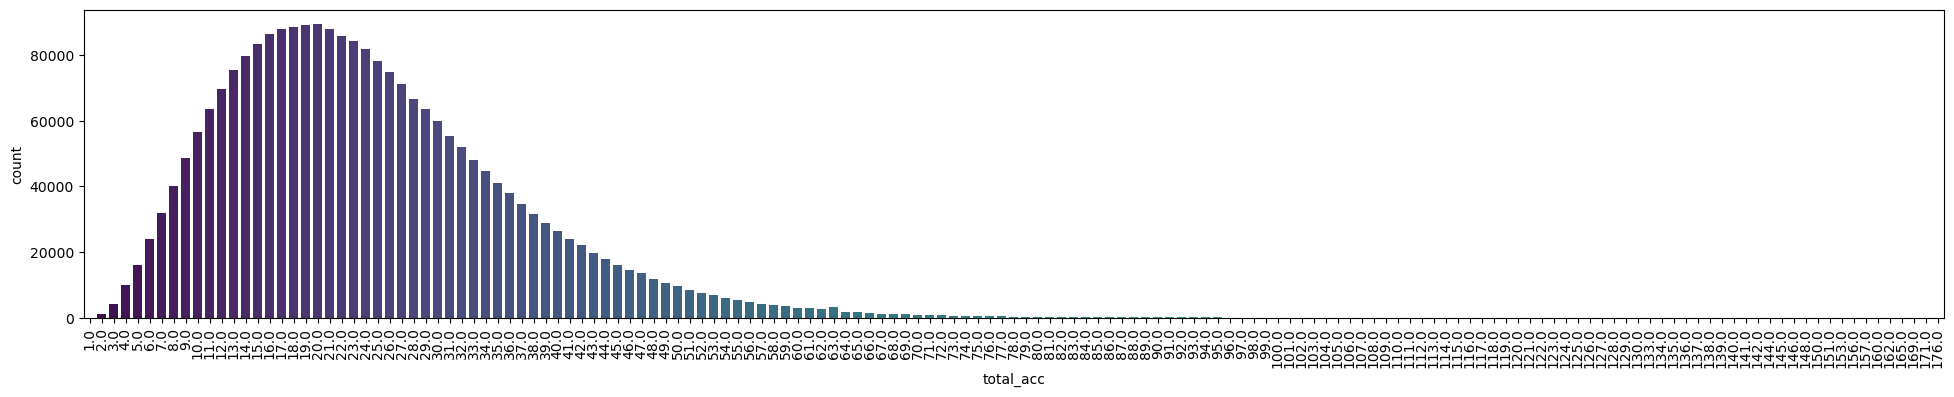

In [89]:
plt.figure(figsize=(24,4))
plt.xticks(rotation=90)
sns.countplot(data=df_copy, x='total_acc', palette='viridis');

In [21]:
#存在异常值，删除>63的行--这里主观性
df_copy = df_copy[df_copy['total_acc'] < 64]

In [22]:
df_copy.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,2425421.0,15568.223888,9458.462401,500.0000,8000.0000,14000.0000,21000.0000,4.000000e+04
term,2425421.0,43.290538,11.037256,36.0000,36.0000,36.0000,60.0000,6.000000e+01
int_rate,2425421.0,0.130423,0.048562,0.0531,0.0917,0.1249,0.1599,3.099000e-01
installment,2425421.0,457.565886,272.216277,4.9300,259.3300,389.0300,610.7500,1.719830e+03
grade,2425421.0,1.561019,1.236414,0.0000,1.0000,1.0000,2.0000,6.000000e+00
sub_grade,2425421.0,9.774847,6.185629,0.0000,5.0000,9.0000,14.0000,3.400000e+01
emp_length,2425421.0,6.473576,3.383780,1.0000,3.0000,7.0000,10.0000,1.000000e+01
annual_inc,2425421.0,82295.998819,116966.314186,14.0000,50000.0000,70000.0000,98000.0000,1.100000e+08
dti,2425421.0,18.965980,11.580534,0.0100,12.1400,18.0500,24.7000,9.990000e+02
delinq_2yrs,2425421.0,0.296205,0.847697,0.0000,0.0000,0.0000,0.0000,3.900000e+01


### 重新整理下数据，分为数值和object

In [23]:
df_copy

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,loan_status,collections_12_mths_ex_med
0,5000.0,36,0.1065,162.87,1,6,10.0,RENT,24000.0,Verified,...,0.0,1.0,3.0,0.0,13648.0,0.837,9.0,171.62,Paid,0.0
2,2400.0,36,0.1596,84.33,2,14,10.0,RENT,12252.0,Not Verified,...,0.0,2.0,2.0,0.0,2956.0,0.985,10.0,649.91,Paid,0.0
3,10000.0,36,0.1349,339.31,2,10,10.0,RENT,49200.0,Source Verified,...,0.0,1.0,10.0,0.0,5598.0,0.210,37.0,357.48,Paid,0.0
4,3000.0,60,0.1269,67.79,1,9,1.0,RENT,80000.0,Source Verified,...,0.0,0.0,15.0,0.0,27783.0,0.539,38.0,67.30,Paid,0.0
5,5000.0,36,0.0790,156.46,0,3,3.0,RENT,36000.0,Source Verified,...,0.0,3.0,9.0,0.0,7963.0,0.283,12.0,161.03,Paid,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2715561,12000.0,60,0.2869,378.65,5,25,10.0,MORTGAGE,64500.0,Not Verified,...,0.0,3.0,22.0,1.0,16478.0,0.513,42.0,10820.77,Paid,0.0
2715564,10000.0,36,0.0799,313.32,0,4,10.0,MORTGAGE,65000.0,Source Verified,...,1.0,0.0,15.0,0.0,9751.0,0.157,27.0,2151.99,Paid,0.0
2715565,10050.0,36,0.1699,358.26,3,15,8.0,RENT,37000.0,Not Verified,...,0.0,1.0,15.0,0.0,14300.0,0.470,21.0,358.26,Default,0.0
2715566,6000.0,36,0.1144,197.69,1,8,5.0,RENT,41000.0,Source Verified,...,1.0,0.0,9.0,0.0,1356.0,0.101,18.0,2958.01,Paid,0.0


In [24]:
df_copy.to_csv('data-4+18.csv', index=False)

-----多重共线性非常严重，下面的暂时无效

## 平台角度分析

### 结果指标-贷款状态分析

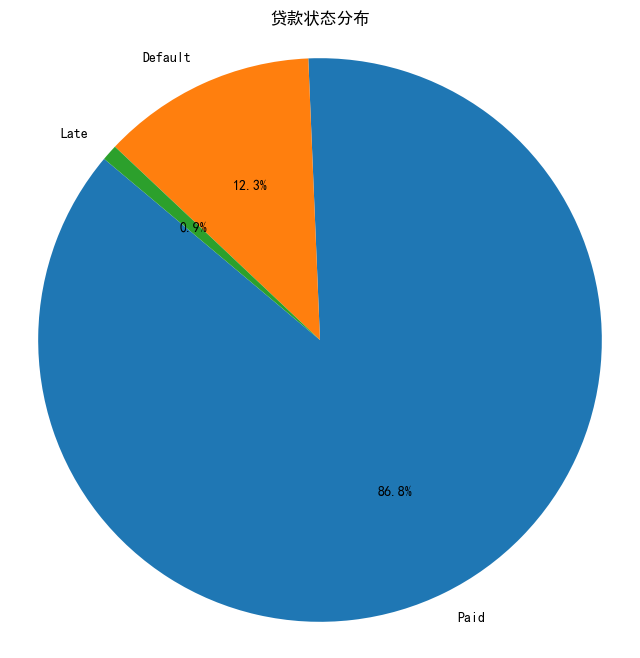

In [99]:
# 计算每种贷款状态的数量
loan_status_counts = df_copy['loan_status'].value_counts()

# 绘制饼图
plt.figure(figsize=(8, 8))  # 设置饼图的大小
plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('贷款状态分布')  # 设置饼图的标题
plt.axis('equal')  # 确保饼图是圆的

# 显示饼图
plt.show()

### 衡量指标-贷款利率&贷款金额

In [96]:
# 设置matplotlib的字体为支持中文的字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号

[Text(0.5, 0, '贷款金额'), Text(0.5, 1.0, '贷款金额分布')]

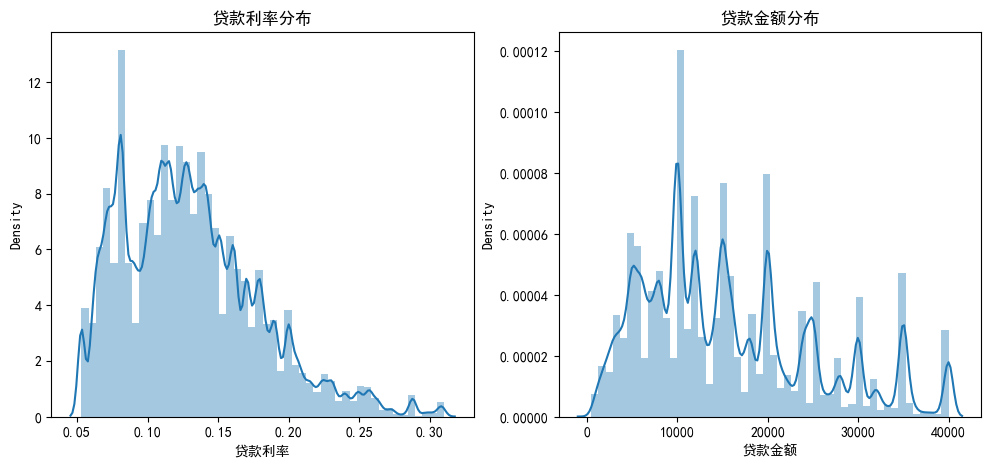

In [97]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
fig.set_size_inches(12,5)

sns.distplot(df_copy['int_rate'],ax=ax1)
sns.distplot(df_copy['loan_amnt'],ax=ax2)

ax1.set(xlabel='贷款利率',title='贷款利率分布',)
ax2.set(xlabel='贷款金额',title='贷款金额分布')

### 衡量指标-贷款等级

[Text(0.5, 0, '贷款子等级'), Text(0.5, 1.0, '贷款子等级分布')]

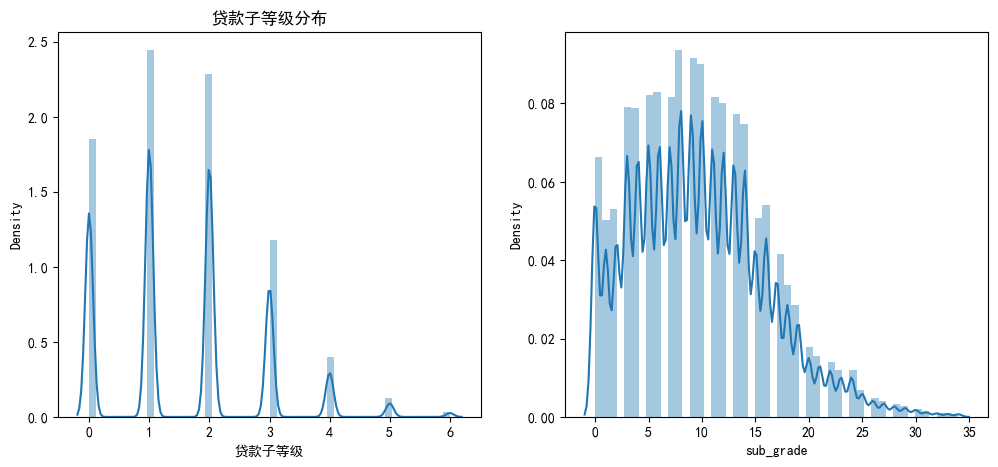

In [101]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
fig.set_size_inches(12,5)

sns.distplot(df_copy['grade'],ax=ax1)
sns.distplot(df_copy['sub_grade'],ax=ax2)

ax1.set(xlabel='贷款主等级',title='贷款主等级分布',)
ax1.set(xlabel='贷款子等级',title='贷款子等级分布',)

[Text(0.5, 0, '贷款月付'), Text(0.5, 1.0, '贷款月付分布')]

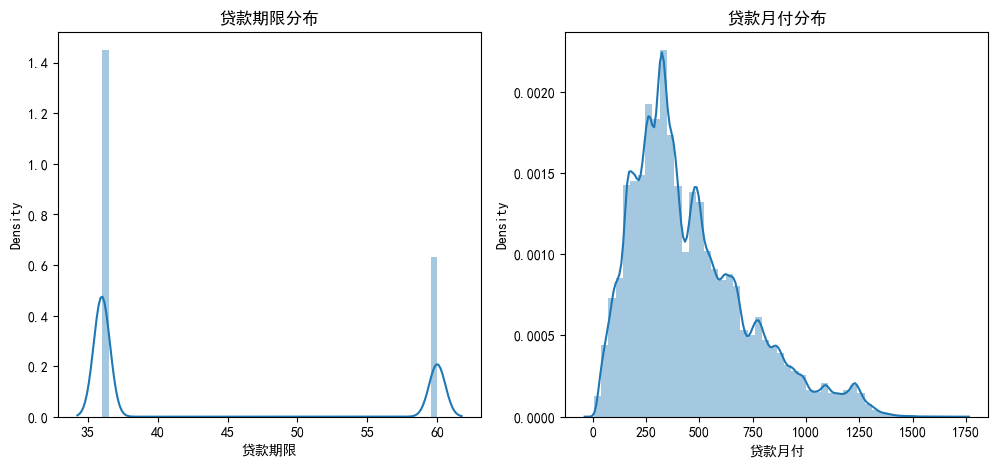

In [102]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
fig.set_size_inches(12,5)

sns.distplot(df_copy['term'],ax=ax1)
sns.distplot(df_copy['installment'],ax=ax2)

ax1.set(xlabel='贷款期限',title='贷款期限分布',)
ax2.set(xlabel='贷款月付',title='贷款月付分布')

## 客户角度

[Text(0.5, 0, '负债收入比'), Text(0.5, 1.0, '负债收入比分布')]

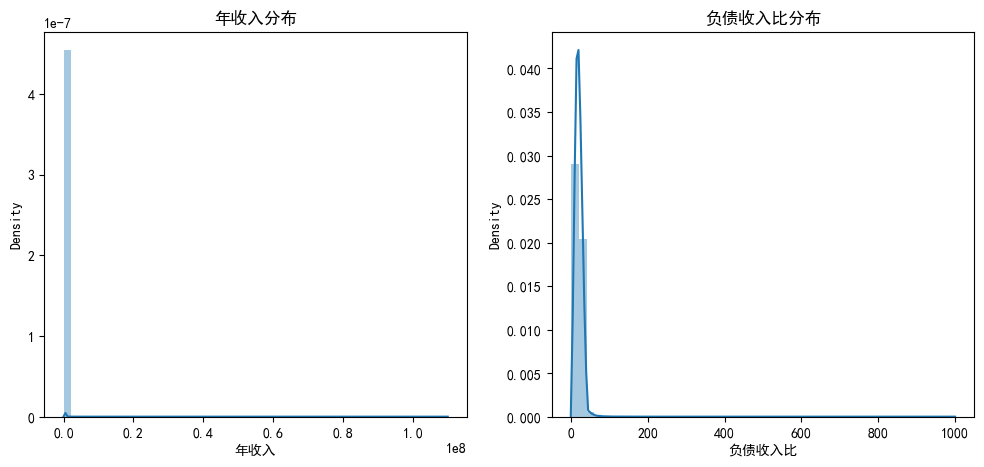

In [106]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
fig.set_size_inches(12,5)

sns.distplot(df_copy['annual_inc'],ax=ax1)
sns.distplot(df_copy['dti'],ax=ax2)

ax1.set(xlabel='年收入',title='年收入分布')
ax2.set(xlabel='负债收入比',title='负债收入比分布')

选择有效的指标

In [109]:
# 将我们的特征分为分类和数字
categorical= [ 'home_ownership', 'verification_status', 'purpose',  'loan_status']
numerical=['installment','loan_amnt','int_rate','grade','sub_grade','term','annual_inc','dti','emp_length','collections_12_mths_ex_med','delinq_2yrs','open_acc','pub_rec','revol_bal','revol_util',]
# 将指定列转换为float64类型
df_copy[numerical] = df_copy[numerical].astype('float64')

In [110]:
print("categorical columns:",categorical)
print("numerical columns:",numerical)

categorical columns: ['home_ownership', 'verification_status', 'purpose', 'loan_status']
numerical columns: ['installment', 'loan_amnt', 'int_rate', 'grade', 'sub_grade', 'term', 'annual_inc', 'dti', 'emp_length', 'collections_12_mths_ex_med', 'delinq_2yrs', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util']


In [112]:
loan_info = ['installment','loan_amnt','int_rate','grade','sub_grade','term']
yingzhibiao = ['annual_inc', 'dti']  #'home_ownership',
jibenxinxi = [ 'emp_length','collections_12_mths_ex_med']  # 'purpose',
credit_info = [ 'delinq_2yrs', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util'] # 'verification_status'

## 针对categorical变量

Text(0.5, 1.0, 'Loan status count')

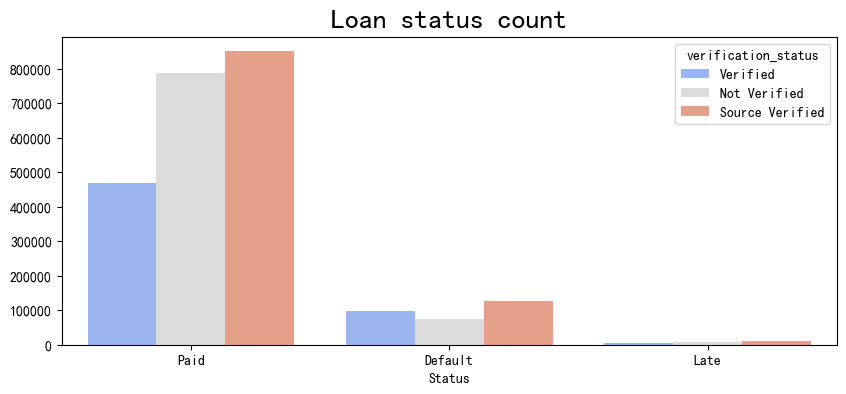

In [114]:
fig, ax =plt.subplots(figsize=(10,4))
sns.countplot(data=df_copy,x="loan_status",hue="verification_status",palette='coolwarm')
ax.set(xlabel='Status', ylabel='')
ax.set_title('Loan status count', size=20)

Text(0.5, 1.0, 'Loan status count')

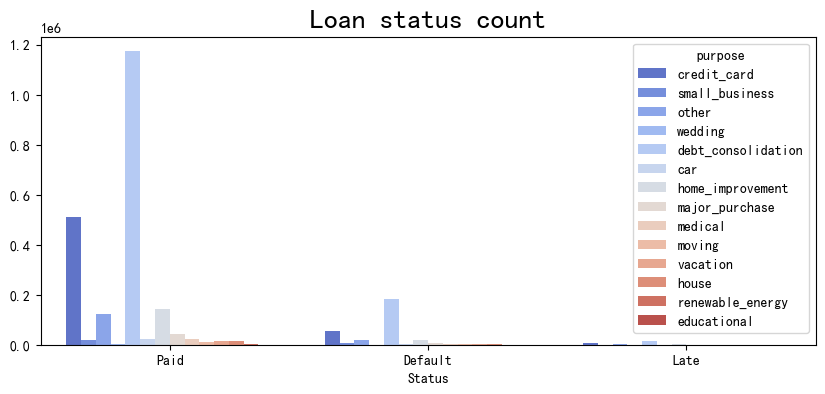

In [115]:
fig, ax =plt.subplots(figsize=(10,4))
sns.countplot(data=df_copy,x="loan_status",hue="purpose",palette='coolwarm')
ax.set(xlabel='Status', ylabel='')
ax.set_title('Loan status count', size=20)

Text(0.5, 1.0, 'Loan status count')

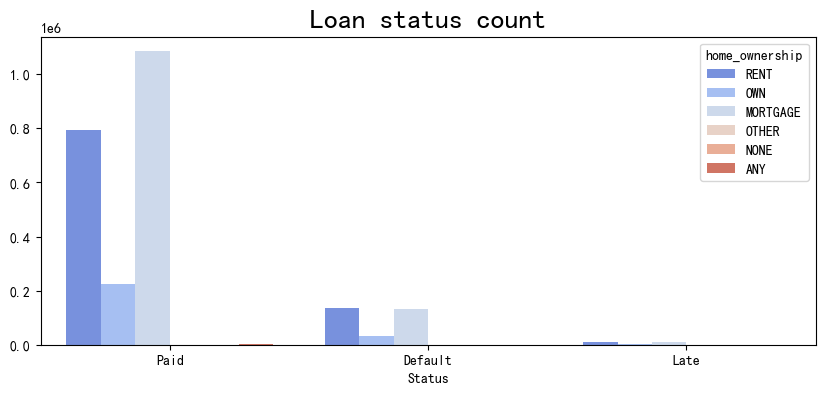

In [119]:
fig, ax =plt.subplots(figsize=(10,4))
sns.countplot(data=df_copy,x="loan_status",hue="home_ownership",palette='coolwarm')
ax.set(xlabel='Status', ylabel='')
ax.set_title('Loan status count', size=20)

### 针对numeric变量检查共线性

In [120]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [123]:
# 假设df_features是特征集，即检查多重共线性的列
df_features_numeric = df_copy[numerical] 

# 计算VIF
vif_data = pd.DataFrame()
vif_data["feature"] = df_features_numeric.columns

# 计算每个特征的VIF值
vif_data["VIF"] = [variance_inflation_factor(df_features_numeric.values, i) for i in range(len(df_features_numeric.columns ))]

# 打VIFf值
print(vif_data)

# 一般认为，IFf值大于10时存在较高的多重共线性
# 可以根据这个阈值来决定是否需要移除或合并某些特征

                       feature         VIF
0                  installment   94.811915
1                    loan_amnt  107.505549
2                     int_rate  106.449467
3                        grade   48.119343
4                    sub_grade  106.070030
5                         term   46.435059
6                   annual_inc    1.617952
7                          dti    4.154899
8                   emp_length    4.598445
9   collections_12_mths_ex_med    1.021321
10                 delinq_2yrs    1.142967
11                    open_acc    6.354831
12                     pub_rec    1.130390
13                   revol_bal    2.040937
14                  revol_util    5.963417


前6个vif非常大的列被归为平台贷款信息列，这里我们选择主成分pca进行分析，将他们消除量纲后，将为成一列，方便后续的模型建立

In [131]:
from sklearn.decomposition import PCA
# 选择要进行PCA的列
columns_to_pca = ['installment', 'loan_amnt', 'int_rate', 'grade', 'sub_grade', 'term']

# 标准化处理
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_copy[columns_to_pca]), columns=columns_to_pca)

# 应用PCA
pca = PCA(n_components=1)  # 只需要一个主成分
df_pca = pca.fit_transform(df_scaled)

# 将PCA结果合并为一个新的变量列
df_copy['pca_loan_component'] = df_pca

print(df.head())

   loan_amnt  term int_rate  installment  grade  sub_grade  emp_length  \
0     5000.0    36   10.65%       162.87      1          6        10.0   
1     2500.0    60   15.27%        59.83      2         13         NaN   
2     2400.0    36   15.96%        84.33      2         14        10.0   
3    10000.0    36   13.49%       339.31      2         10        10.0   
4     3000.0    60   12.69%        67.79      1          9         1.0   

  home_ownership  annual_inc verification_status  ... delinq_2yrs  \
0           RENT     24000.0            Verified  ...         0.0   
1           RENT     30000.0     Source Verified  ...         0.0   
2           RENT     12252.0        Not Verified  ...         0.0   
3           RENT     49200.0     Source Verified  ...         0.0   
4           RENT     80000.0     Source Verified  ...         0.0   

   inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  total_acc  \
0             1.0       3.0      0.0    13648.0       83.7%       

In [137]:
df_copy = df_copy.drop(['installment', 'loan_amnt', 'int_rate', 'grade', 'sub_grade', 'term'], axis=1)

In [138]:
df_copy

,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,loan_status,collections_12_mths_ex_med,pca_loan_component
0,10.0,RENT,24000.0,Verified,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,0.837,9.0,171.62,Paid,0.0,-1.404082
2,10.0,RENT,12252.0,Not Verified,small_business,8.72,0.0,2.0,2.0,0.0,2956.0,0.985,10.0,649.91,Paid,0.0,0.202882
3,10.0,RENT,49200.0,Source Verified,other,20.00,0.0,1.0,10.0,0.0,5598.0,0.210,37.0,357.48,Paid,0.0,-0.117528
4,1.0,RENT,80000.0,Source Verified,other,17.94,0.0,0.0,15.0,0.0,27783.0,0.539,38.0,67.30,Paid,0.0,-0.360706
5,3.0,RENT,36000.0,Source Verified,wedding,11.20,0.0,3.0,9.0,0.0,7963.0,0.283,12.0,161.03,Paid,0.0,-2.397931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2715561,10.0,MORTGAGE,64500.0,Not Verified,home_improvement,9.66,0.0,3.0,22.0,1.0,16478.0,0.513,42.0,10820.77,Paid,0.0,4.847621
2715564,10.0,MORTGAGE,65000.0,Source Verified,debt_consolidation,19.55,1.0,0.0,15.0,0.0,9751.0,0.157,27.0,2151.99,Paid,0.0,-2.113188
2715565,8.0,RENT,37000.0,Not Verified,debt_consolidation,20.56,0.0,1.0,15.0,0.0,14300.0,0.470,21.0,358.26,Default,0.0,1.140147
2715566,5.0,RENT,41000.0,Source Verified,credit_card,19.99,1.0,0.0,9.0,0.0,1356.0,0.101,18.0,2958.01,Paid,0.0,-1.104685


到这里异常值，数据类型（cate/num）分类完成，且平台贷款信息完成pca降维，现有17列，其中1列目标变量，3列object

In [139]:
# One hot encoding
df_copy=pd.get_dummies(data=df_copy,columns=['home_ownership','verification_status','purpose'],drop_first=True)
df_copy.head()

,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10.0,24000.0,27.65,0.0,1.0,3.0,0.0,13648.0,0.837,9.0,...,False,False,False,False,False,False,False,False,False,False
2,10.0,12252.0,8.72,0.0,2.0,2.0,0.0,2956.0,0.985,10.0,...,False,False,False,False,False,False,False,True,False,False
3,10.0,49200.0,20.00,0.0,1.0,10.0,0.0,5598.0,0.210,37.0,...,False,False,False,False,False,True,False,False,False,False
4,1.0,80000.0,17.94,0.0,0.0,15.0,0.0,27783.0,0.539,38.0,...,False,False,False,False,False,True,False,False,False,False
5,3.0,36000.0,11.20,0.0,3.0,9.0,0.0,7963.0,0.283,12.0,...,False,False,False,False,False,False,False,False,False,True


In [140]:
df_copy.to_csv('data-with-onehot-and-loanstatus.csv', index=False)